<a href="https://colab.research.google.com/github/inyunita/Credit-Risk-Prediction/blob/main/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Dataset**

In [ ]:
loanData = "/content/drive/MyDrive/VIX Intern IDX-Rakamin/Final Task/loan_data_2007_2014.csv"
df_creditLoan = pd.read_csv(loanData, index_col = 0, low_memory=False)
df_creditLoan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


## **Data Understanding**

In [ ]:
df_creditLoan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
print("Shape Data: ", df_creditLoan.shape)

Shape Data:  (466285, 74)


In [ ]:
#Delete Column that contains NaN Value in all rows
df_creditLoan = df_creditLoan.dropna(axis = 1, how='all')
print("Shape Data After Delete Column that Contains NaN Value: ", df_creditLoan.shape)


Shape Data After Delete Column that Contains NaN Value:  (466285, 57)


In [ ]:
df_creditLoan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
#change ID to string
df_creditLoan[['id', 'member_id']]= df_creditLoan[['id', 'member_id']].astype(str)
df_creditLoan.info()

<ipython-input-8-92d0de952463>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_creditLoan[['id', 'member_id']]= df_creditLoan[['id', 'member_id']].astype(str)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  object 
 1   member_id                    466285 non-null  object 
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
#categorical column
categoric_col = df_creditLoan.select_dtypes(exclude=[np.number])
categoric_col.describe().transpose()


,count,unique,top,freq
id,466285,466285,1077501,1
member_id,466285,466285,1296599,1
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782


In [ ]:
#drop unnecesary column
print('Shape all : ', df_creditLoan.shape)
unnecessary = ["id", "member_id", "url", "desc", "title", "zip_code", "application_type", "sub_grade", "issue_d", "next_pymnt_d", "last_credit_pull_d", "addr_state", "purpose", "earliest_cr_line" ]
df_loan_clean = df_creditLoan.drop(columns=unnecessary)
print('Shape after dropping unnecessary columns : ', df_loan_clean.shape)


Shape all :  (466285, 57)
Shape after dropping unnecessary columns :  (466285, 43)


In [ ]:
numerical_col = df_loan_clean.select_dtypes(include=[np.number])
numerical_col.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.000000,63000.000000,88960.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.000000,0.000000,1.00000,3.300000e+01
mths_since_last_delinq,215934.0,34.104430,21.778487,0.00,16.000000,31.000000,49.00000,1.880000e+02


In [ ]:
df_loan_clean['policy_code'].value_counts()

1    466285
Name: policy_code, dtype: int64

In [ ]:
print('Shape before dropping unnecessary columns : ', df_loan_clean.shape)
df_loan_clean = df_loan_clean.drop(columns=['policy_code'])
print('Shape after dropping unnecessary columns : ', df_loan_clean.shape)

Shape before dropping unnecessary columns :  (466285, 43)
Shape after dropping unnecessary columns :  (466285, 42)


In [ ]:
df_loan_clean.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
pymnt_plan                          0
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list_status                 0
out_prncp                           0
out_prncp_in

In [ ]:
categoric_feature = df_loan_clean.select_dtypes(exclude=[np.number])
categoric_feature.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276
initial_list_status,466285,2,f,303005
last_pymnt_d,465909,98,Jan-16,179620


In [ ]:
#drop unnecesary column
print('Shape all : ', df_loan_clean.shape)
unnecessary = ["emp_title", "last_pymnt_d"]
df_loan_clean = df_loan_clean.drop(columns=unnecessary)
print('Shape after dropping unnecessary columns : ', df_loan_clean.shape)

Shape all :  (466285, 42)
Shape after dropping unnecessary columns :  (466285, 40)


In [ ]:
categoric_feature = df_loan_clean.select_dtypes(exclude=[np.number])
categoric_feature.describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276
initial_list_status,466285,2,f,303005


In [ ]:
#value in categorical feature
for feature in categoric_feature:
  print('-----'*10)
  print(feature)
  print(df_loan_clean[feature].value_counts())

--------------------------------------------------
term
 36 months    337953
 60 months    128332
Name: term, dtype: int64
--------------------------------------------------
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64
--------------------------------------------------
emp_length
10+ years    150049
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64
--------------------------------------------------
home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64
--------------------------------------------------
verification_status
Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype:

Handling Null Value

In [ ]:
#null value in categorical column
categoric_feature.isnull().sum()

term                       0
grade                      0
emp_length             21008
home_ownership             0
verification_status        0
loan_status                0
pymnt_plan                 0
initial_list_status        0
dtype: int64

In [ ]:
#null value in numerical column
numerical_col.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          4
dti                                 0
delinq_2yrs                        29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_amnt                     0
collections_

Delete Column that contains many null data

In [ ]:
print ("shape before deleting column that contain many null data : ", df_loan_clean.shape)
many_null_feature = ["mths_since_last_delinq", "mths_since_last_record", "mths_since_last_major_derog"]
df_loan_clean = df_loan_clean.drop(columns = many_null_feature)
print ("shape before deleting column that contain many null data : ", df_loan_clean.shape)

shape before deleting column that contain many null data :  (466285, 40)
shape before deleting column that contain many null data :  (466285, 37)


Handling Null Value in Categorical Feature

In [ ]:
df_loan_clean["emp_length"].fillna(df_loan_clean["emp_length"].mode()[0],inplace = True)

In [ ]:
categoric_feature = df_loan_clean.select_dtypes(exclude=[np.number])
categoric_feature.isnull().sum()

term                   0
grade                  0
emp_length             0
home_ownership         0
verification_status    0
loan_status            0
pymnt_plan             0
initial_list_status    0
dtype: int64

Handling Null Value in Numerical Feature

In [ ]:
df_loan_clean["annual_inc"].median()

63000.0

In [ ]:
numeric_null = ["annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc",
                "pub_rec", "revol_util", "total_acc",
                "collections_12_mths_ex_med", "acc_now_delinq",
                "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]

for feature in numeric_null:
  df_loan_clean[feature].fillna(df_loan_clean[feature].median(),inplace = True)

In [ ]:
numeric_feature = df_loan_clean.select_dtypes(include=[np.number])
numeric_feature.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64

Handling duplicat

In [ ]:
#Cek data duplikat
df_loan_clean[df_loan_clean.duplicated()].shape

(0, 37)

In [ ]:
df_loan_clean[df_loan_clean.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim


Note: Tidak ada data yang duplikat

### **Handling outlier in Numerical feature**

In [ ]:
numeric_feature.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt,466285.0,14291.801044,8274.371300,500.00,8000.000000,12000.000000,20000.00000,3.500000e+04
funded_amnt_inv,466285.0,14222.329888,8297.637788,0.00,8000.000000,12000.000000,19950.00000,3.500000e+04
int_rate,466285.0,13.829236,4.357587,5.42,10.990000,13.660000,16.49000,2.606000e+01
installment,466285.0,432.061201,243.485550,15.67,256.690000,379.890000,566.58000,1.409990e+03
annual_inc,466285.0,73277.293307,54963.341145,1896.00,45000.000000,63000.000000,88953.00000,7.500000e+06
dti,466285.0,17.218758,7.851121,0.00,11.360000,16.870000,22.78000,3.999000e+01
delinq_2yrs,466285.0,0.284661,0.797343,0.00,0.000000,0.000000,0.00000,2.900000e+01
inq_last_6mths,466285.0,0.804695,1.091583,0.00,0.000000,0.000000,1.00000,3.300000e+01
open_acc,466285.0,11.186995,4.987380,0.00,8.000000,10.000000,14.00000,8.400000e+01


**Change columns in numeric_feature to list**

In [ ]:
numeric_feature

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,...,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,81539.0,22800.0
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,...,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,81539.0,22800.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,...,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,81539.0,22800.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,81539.0,22800.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,81539.0,22800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,14.47,432.64,110000.0,19.85,0.0,2.0,18.0,...,4557.36,0.00,0.00,0.00,432.64,0.0,0.0,0.0,294998.0,29900.0
466281,22000,22000,22000.0,19.97,582.50,78000.0,18.45,0.0,5.0,18.0,...,2840.88,0.00,0.00,0.00,17.50,0.0,0.0,0.0,221830.0,39400.0
466282,20700,20700,20700.0,16.99,514.34,46000.0,25.65,0.0,2.0,18.0,...,6072.29,0.00,0.00,0.00,514.34,0.0,0.0,0.0,73598.0,13100.0
466283,2000,2000,2000.0,7.90,62.59,83000.0,5.39,3.0,1.0,21.0,...,126.58,0.00,0.00,0.00,1500.68,0.0,0.0,0.0,591610.0,53100.0


In [ ]:
col_numeric_feature = numeric_feature.columns.tolist()
col_numeric_feature

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

Cek Outlier

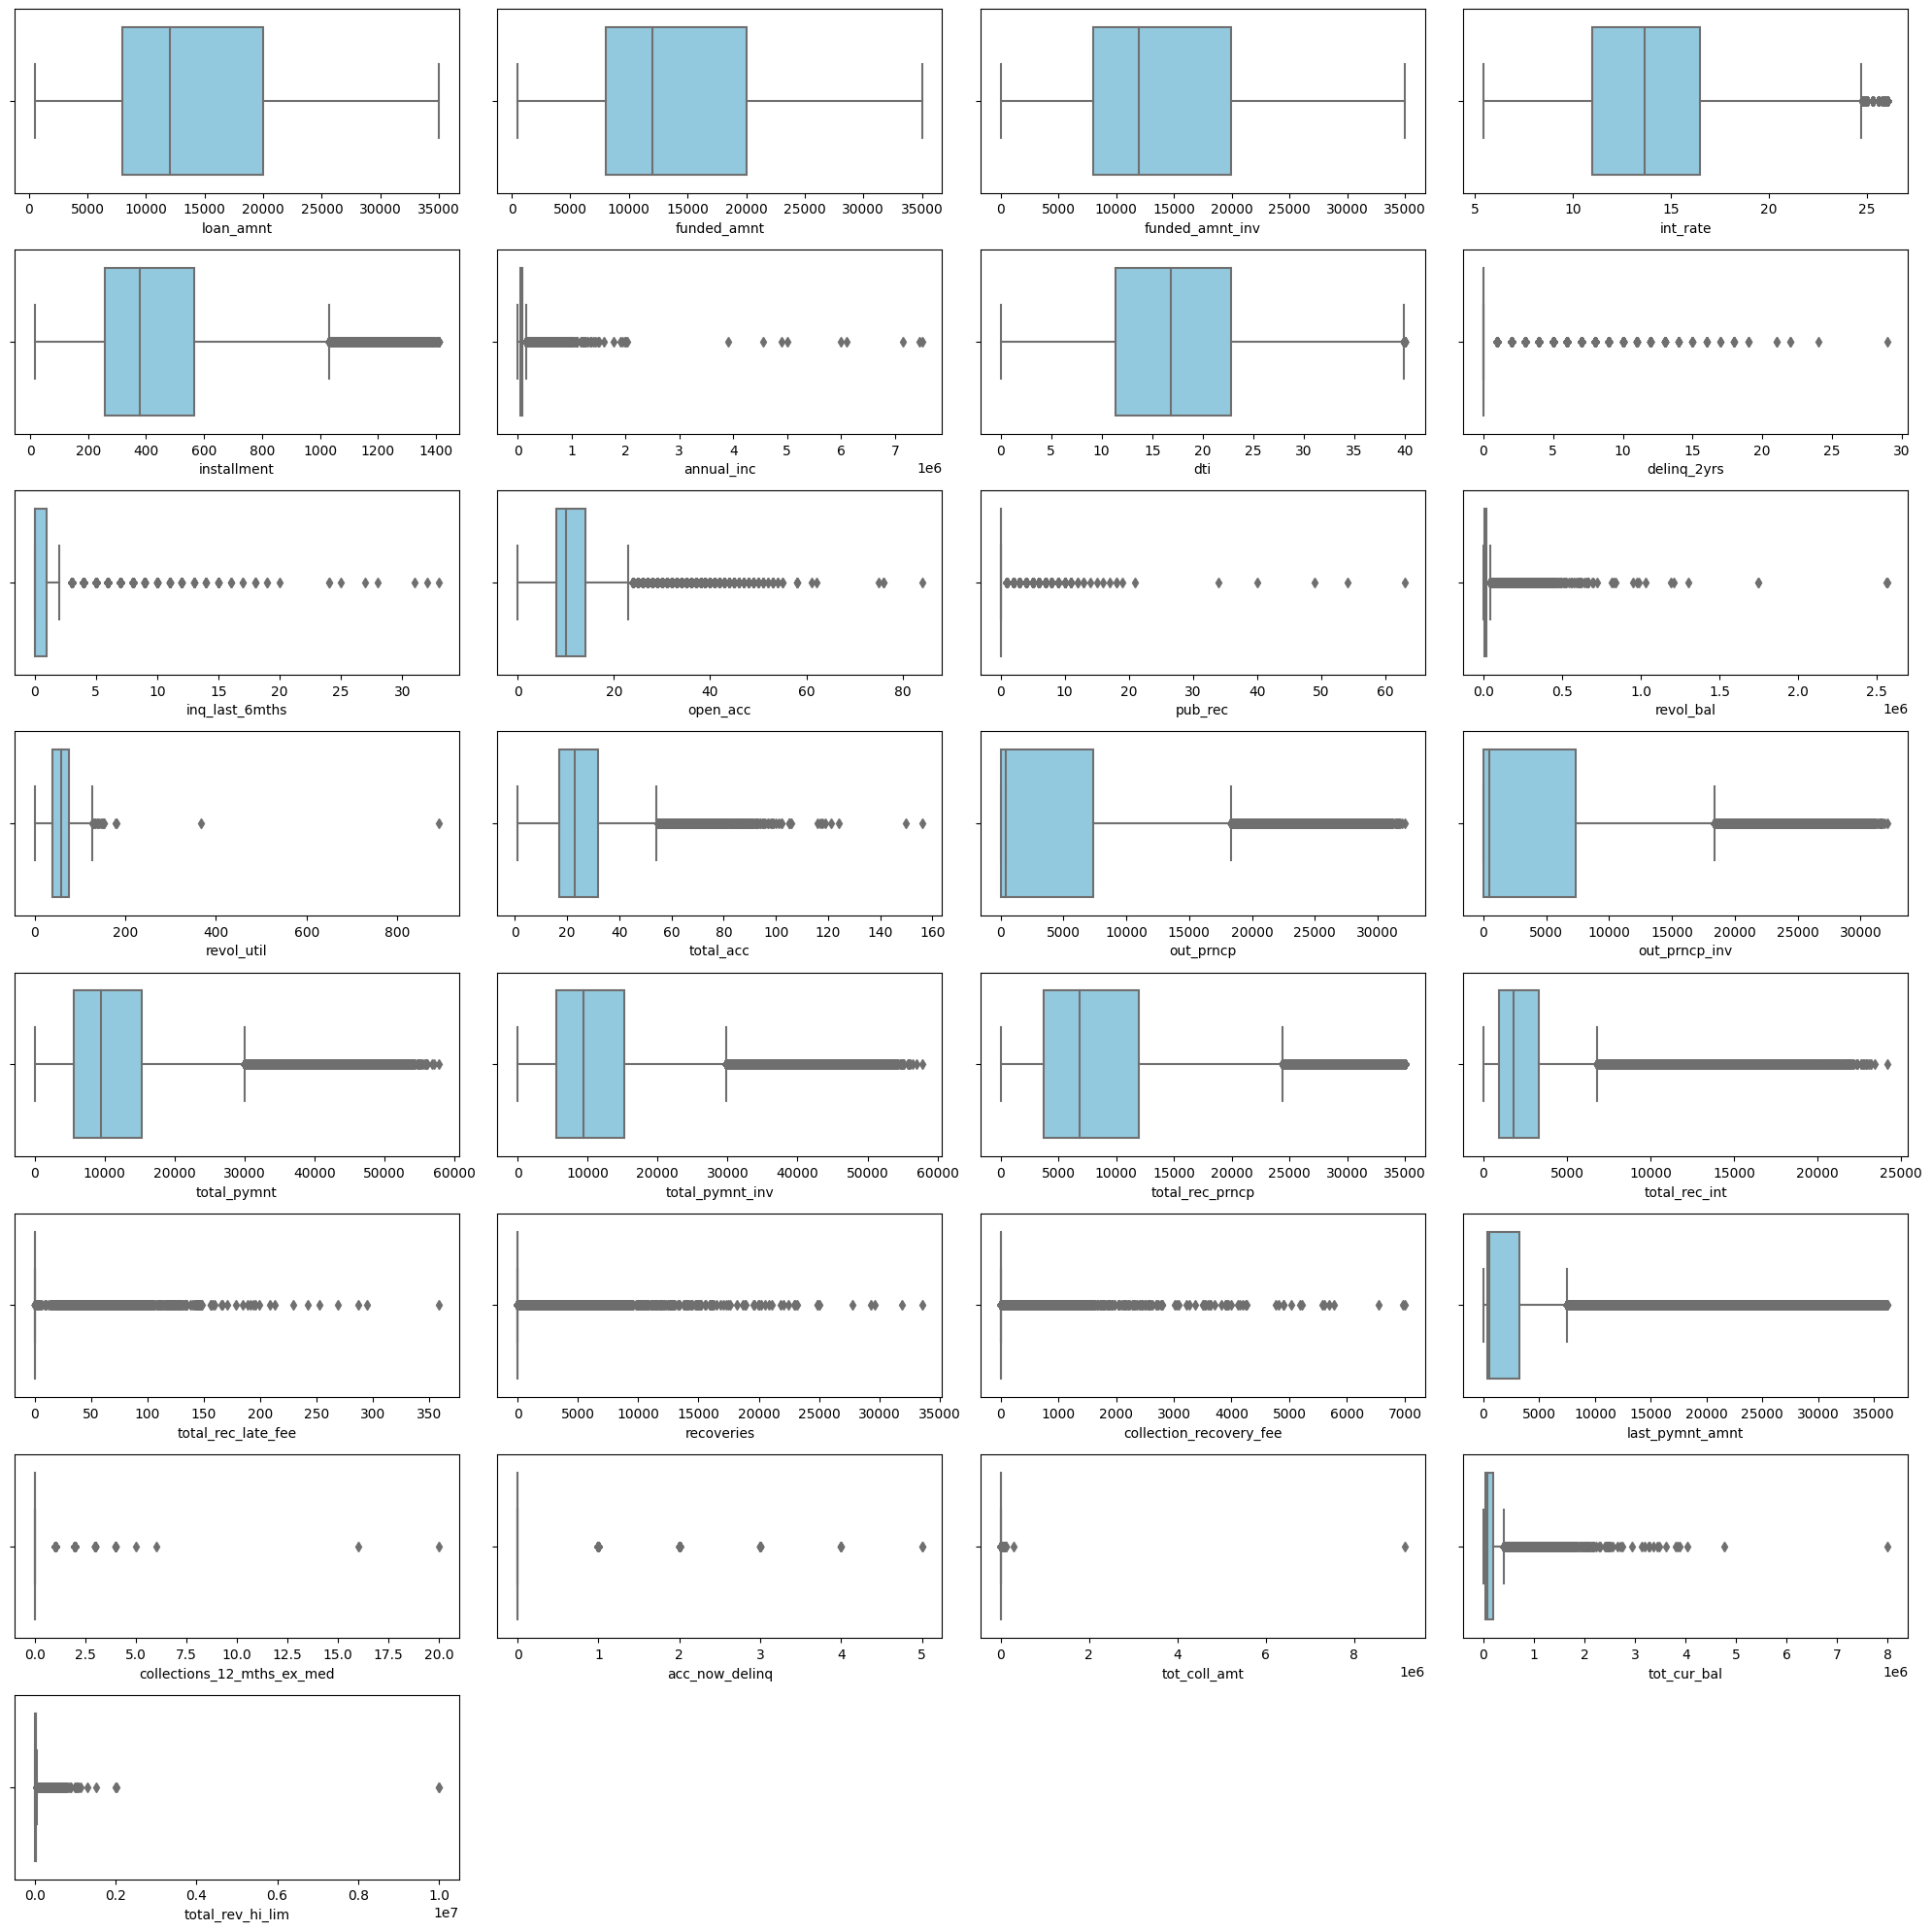

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0, len(col_numeric_feature)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df_loan_clean[col_numeric_feature[i]], color='skyblue')
    plt.xlabel(col_numeric_feature[i])
    plt.tight_layout()

**Menghapus Outlier**

In [ ]:
col_outlier = [
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_pymnt_amnt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [ ]:
def del_outlier(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  min = Q1 - 1.5 * IQR
  max = Q3 + 1.5 * IQR
  df = df[(df[col] >= min) & (df[col] <=max)]
  return df

for col in col_outlier:
    df_loan_clean = del_outlier(df_loan_clean, col)


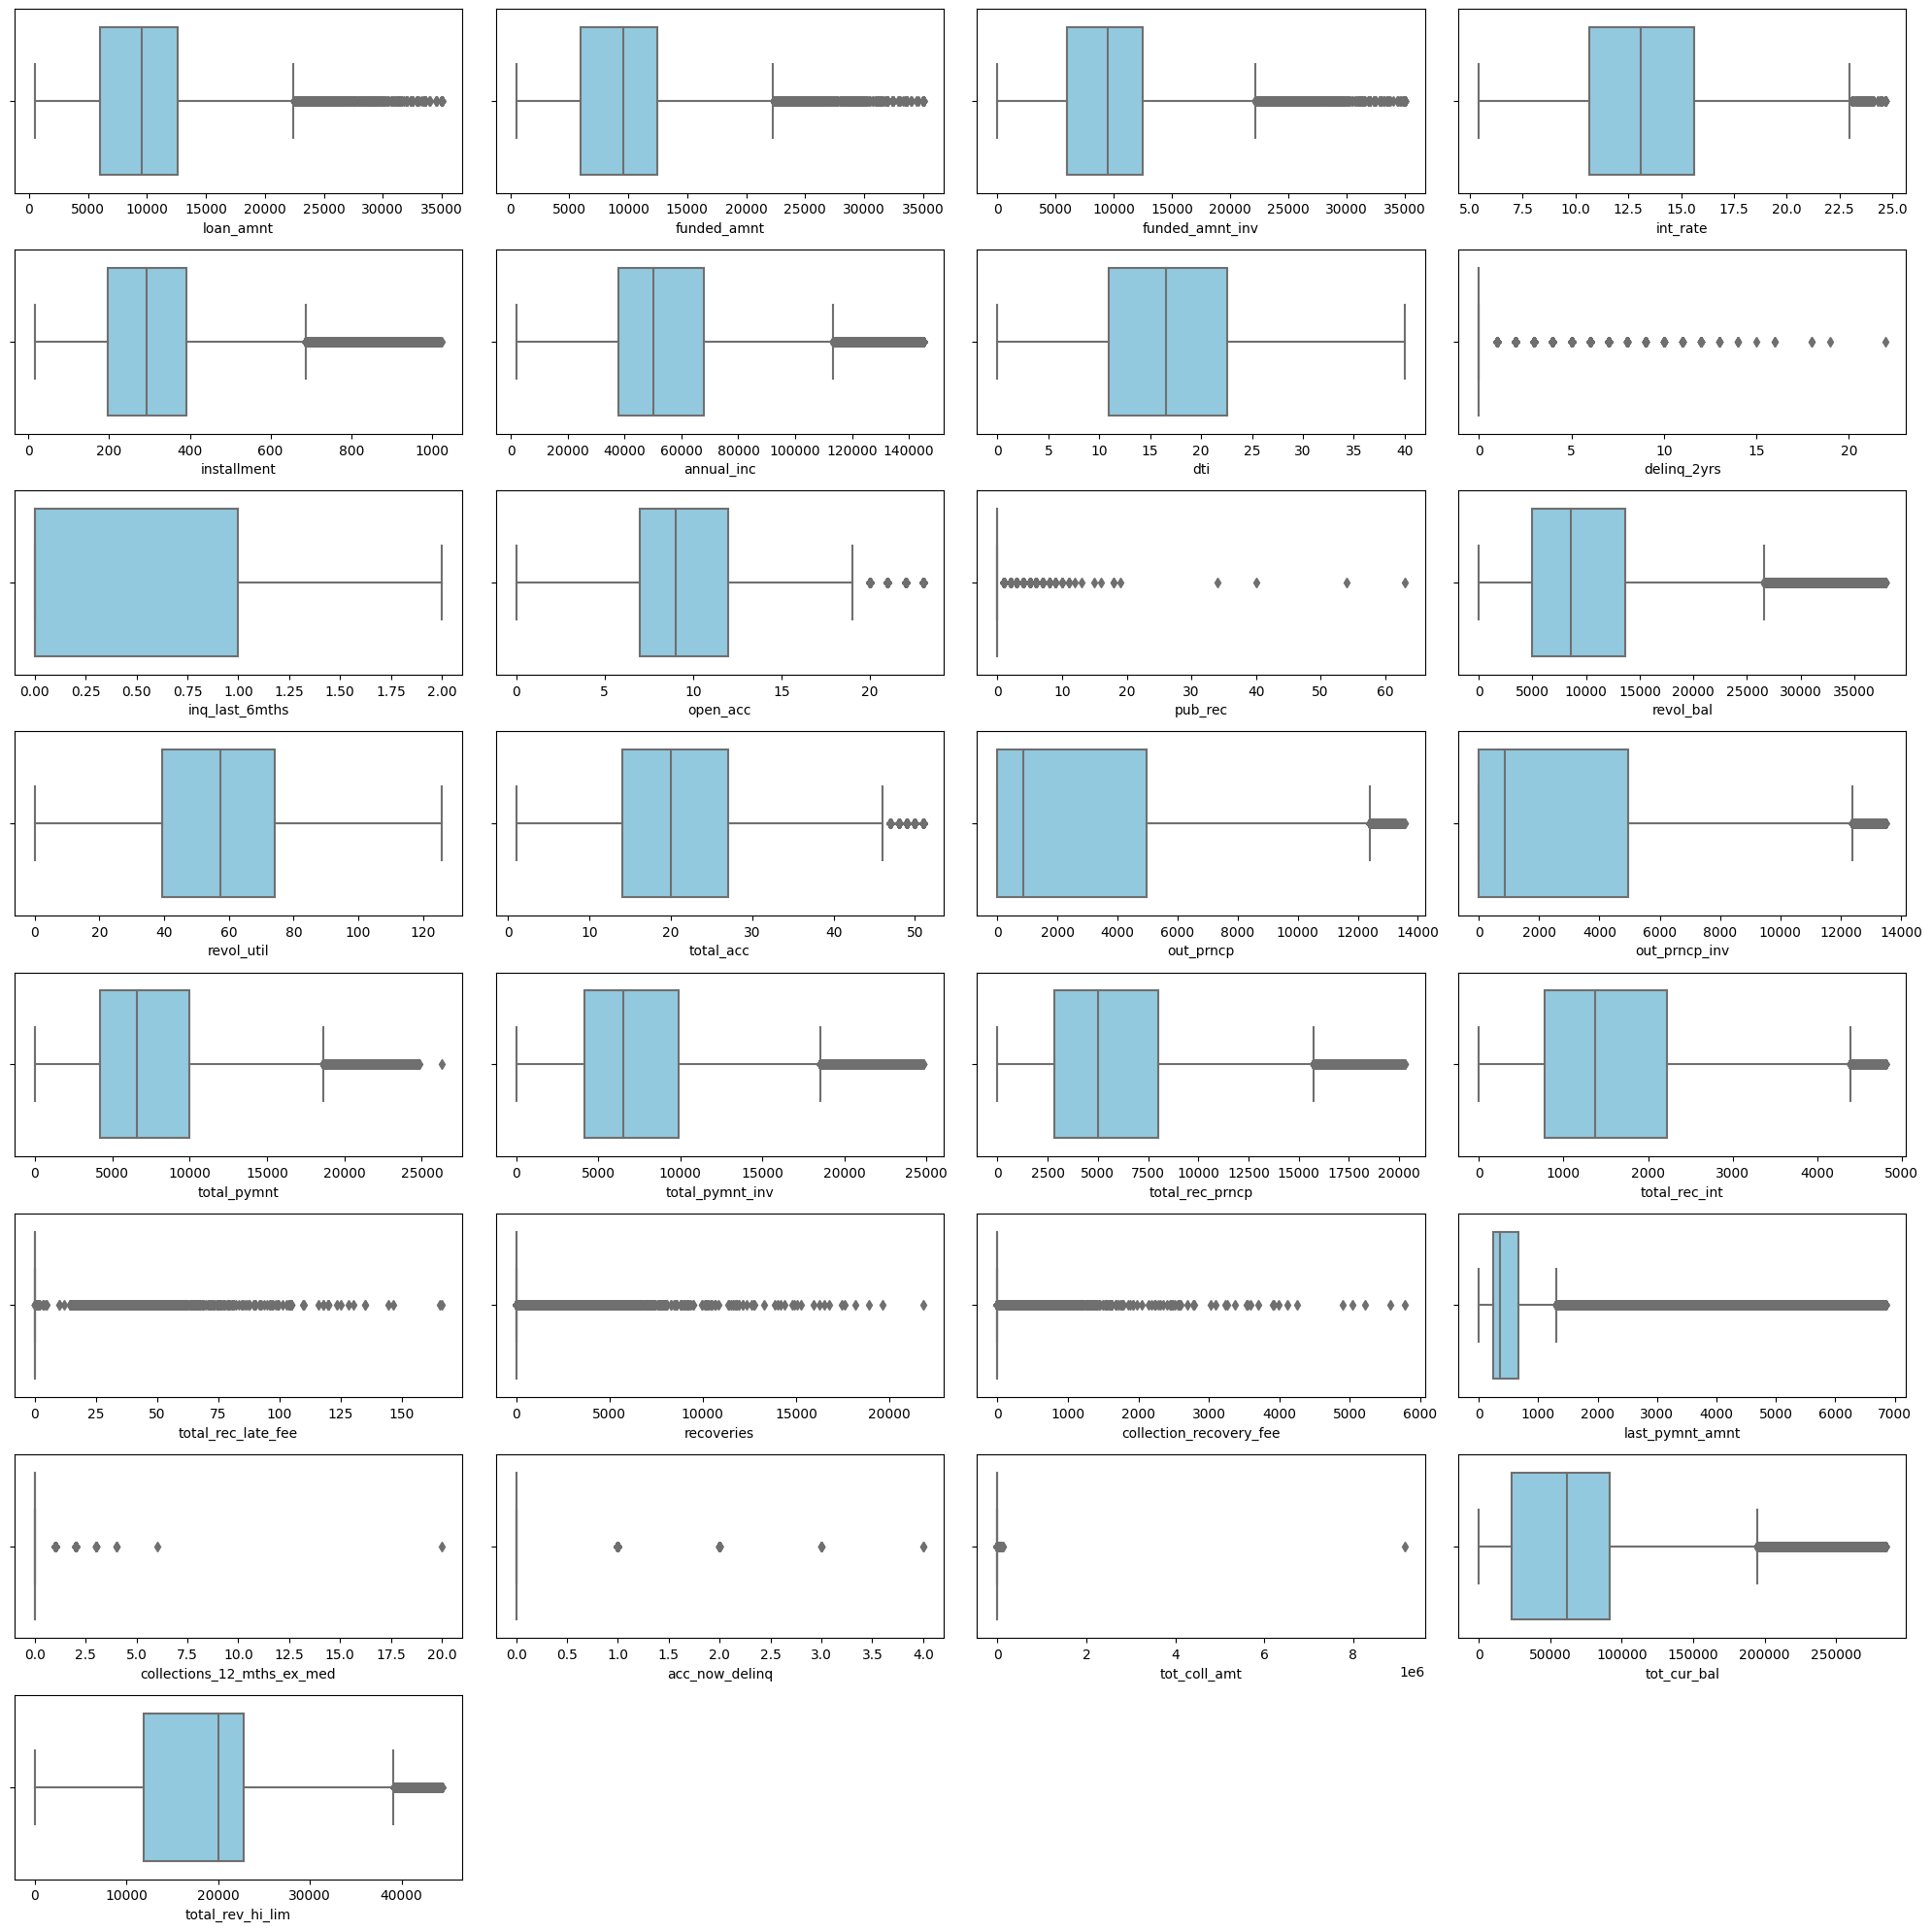

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0, len(col_numeric_feature)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=df_loan_clean[col_numeric_feature[i]], color='skyblue')
    plt.xlabel(col_numeric_feature[i])
    plt.tight_layout()

In [ ]:

print ("shape after deleting outlier : ", df_loan_clean.shape)

shape after deleting outlier :  (228152, 37)


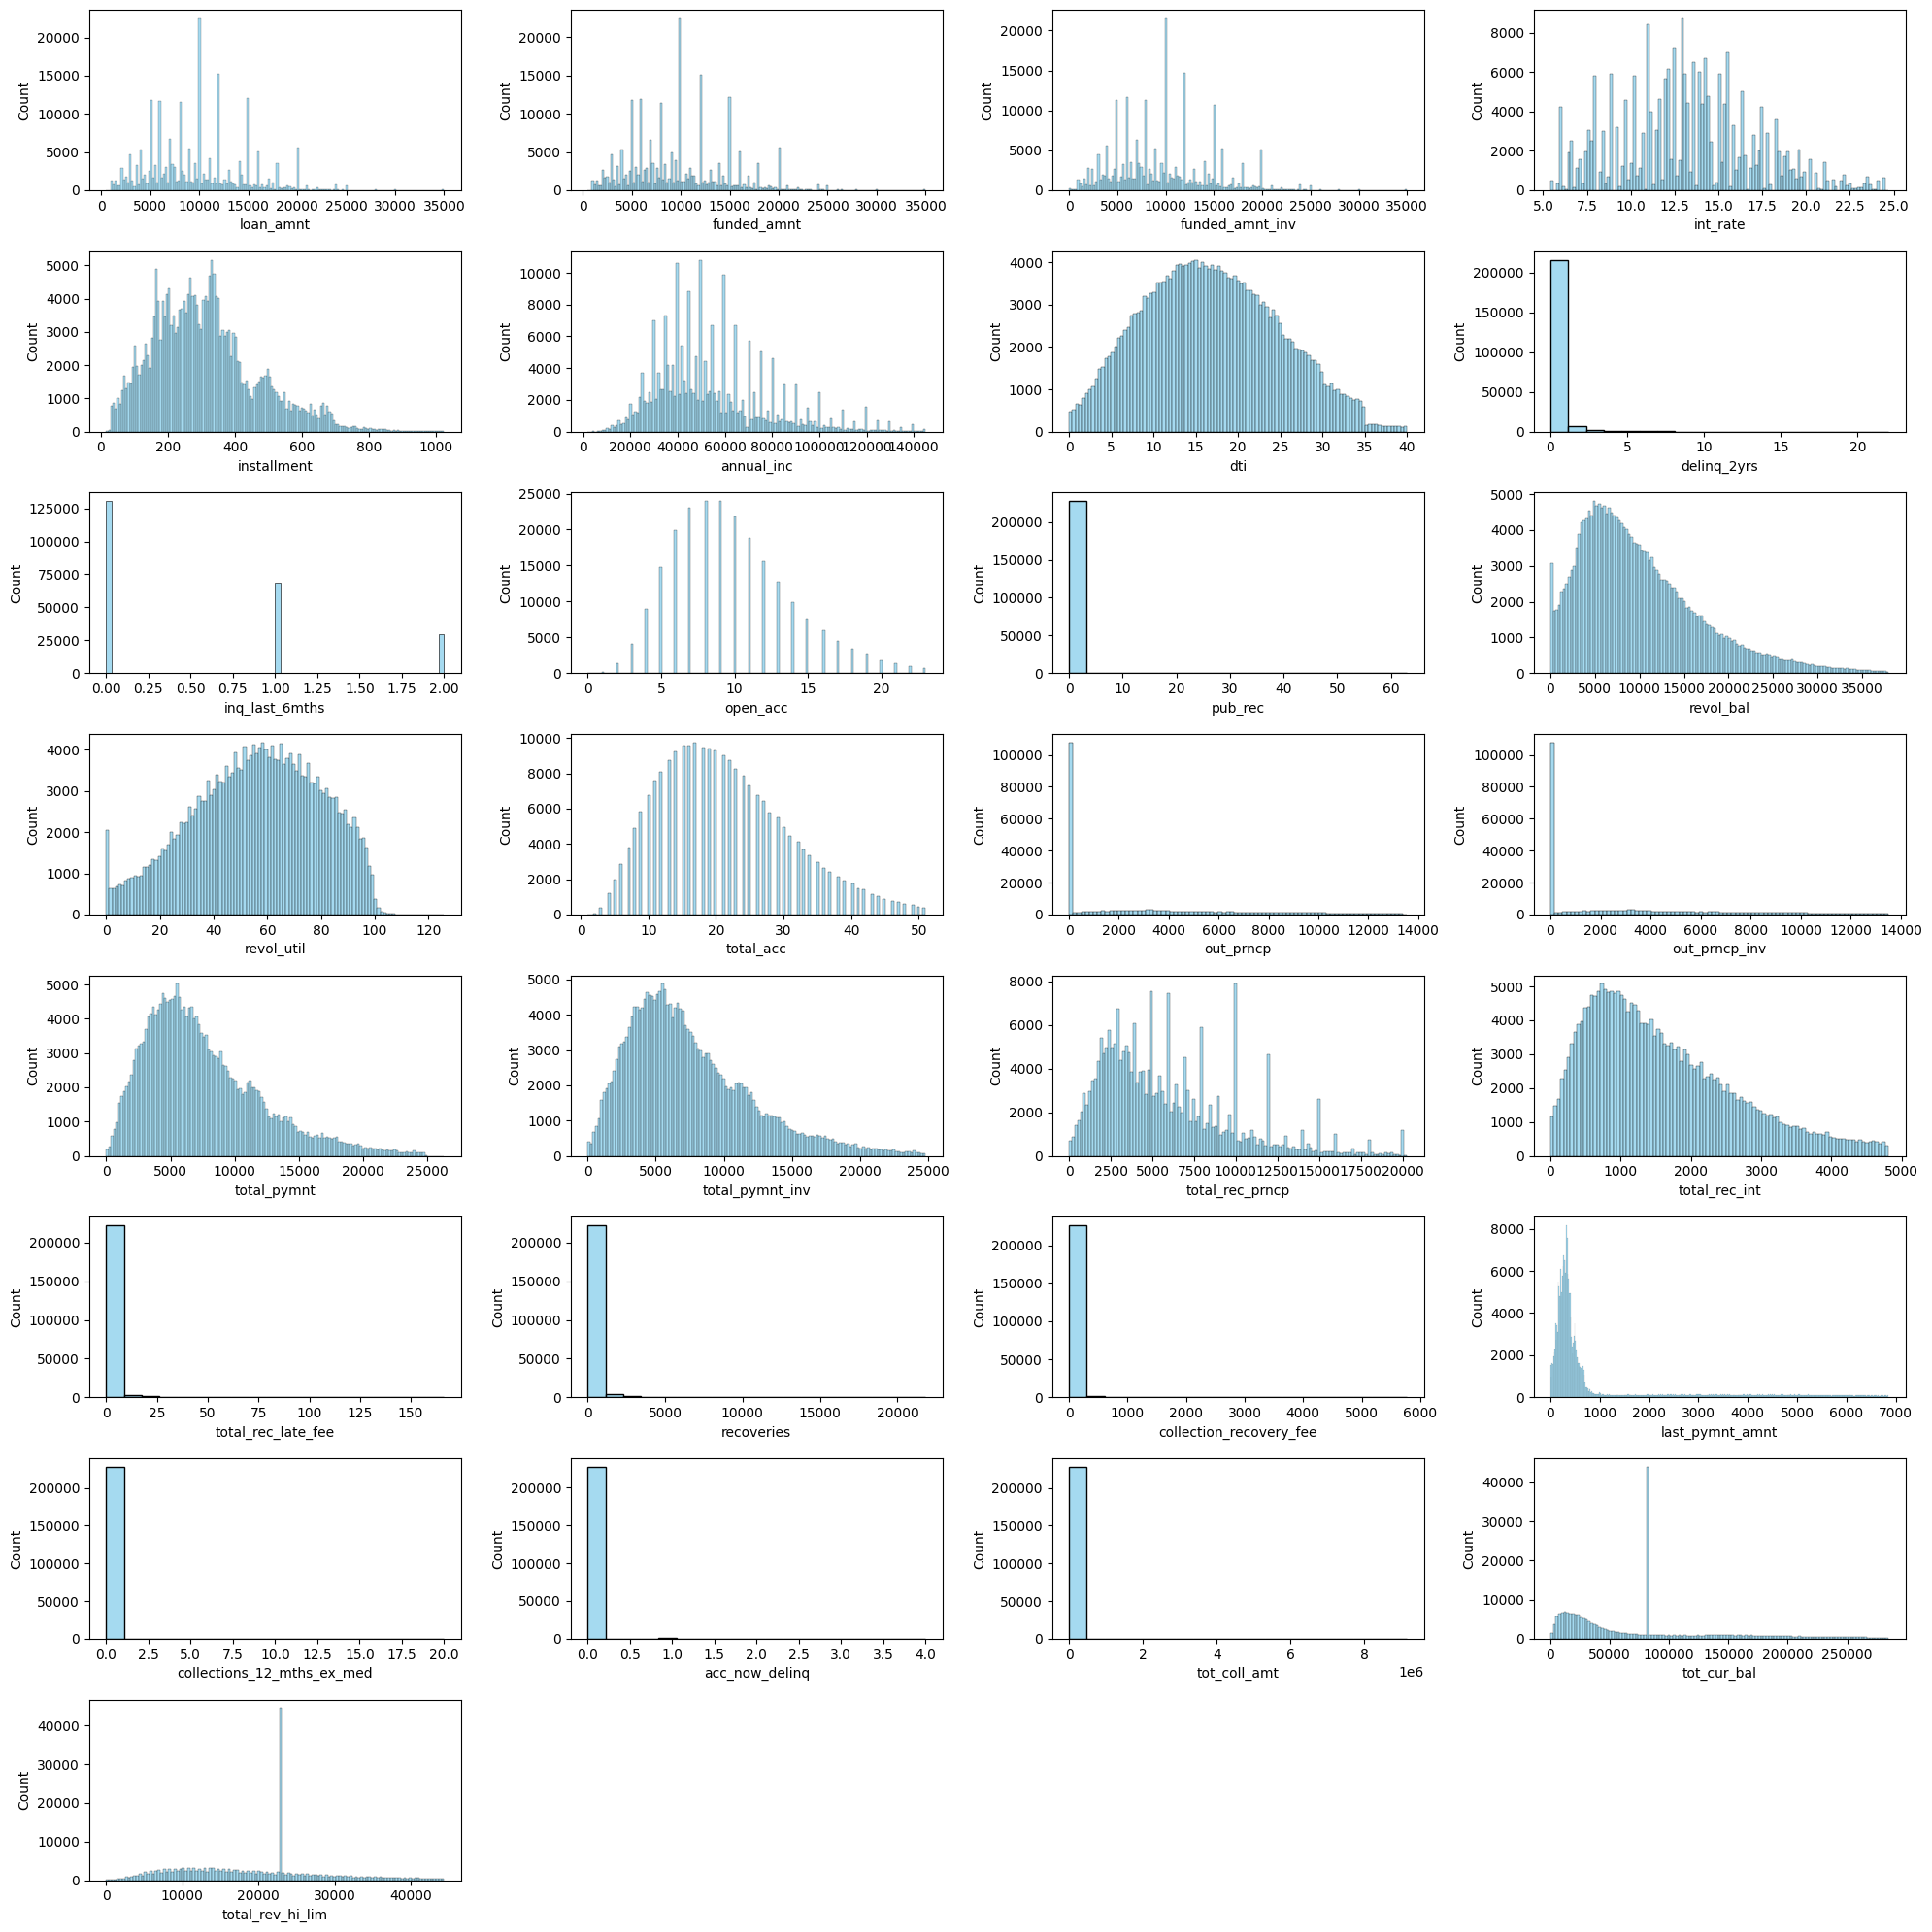

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0, len(col_numeric_feature)):
    plt.subplot(8, 4, i+1)
    sns.histplot(x=df_loan_clean[col_numeric_feature[i]], color='skyblue')
    plt.xlabel(col_numeric_feature[i])
    plt.tight_layout()

### **Feature Engineering**

---



Create Loan_status (target)

In [ ]:
status_counts = df_loan_clean["loan_status"].value_counts()

# Print the value counts
print(status_counts)

Current                                                114839
Fully Paid                                              79823
Charged Off                                             27059
Late (31-120 days)                                       3437
In Grace Period                                          1523
Late (16-30 days)                                         595
Default                                                   401
Does not meet the credit policy. Status:Fully Paid        363
Does not meet the credit policy. Status:Charged Off       112
Name: loan_status, dtype: int64


In [ ]:
# create label
bad = ['Charged Off', 'In Grace Period ',  'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)','Late (16-30 days)']
df_loan_clean['target'] = np.where(df_loan_clean['loan_status'].isin(bad), 0, 1)

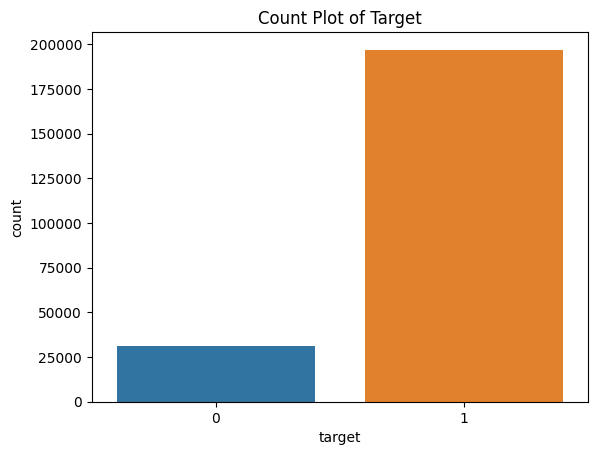

In [ ]:
sns.countplot(x="target", data=df_loan_clean)

# create title plot
plt.title("Count Plot of Target")

# show plot
plt.show()

0 = good loan

1 = bad loan

### **Normalization and Encoding**

### **Separate the numerical column and Categorical Column**

In [ ]:
col_categoric_feature = categoric_feature.columns.tolist()
col_categoric_feature

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'initial_list_status']

In [ ]:
df_categorical = df_loan_clean[col_categoric_feature]
df_numerical = df_loan_clean[col_numeric_feature]
df_target = df_loan_clean['target']

In [ ]:
df_categorical

,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,initial_list_status
0,36 months,B,10+ years,RENT,Verified,Fully Paid,n,f
2,36 months,C,10+ years,RENT,Not Verified,Fully Paid,n,f
3,36 months,C,10+ years,RENT,Source Verified,Fully Paid,n,f
4,60 months,B,1 year,RENT,Source Verified,Current,n,f
6,60 months,C,8 years,RENT,Not Verified,Current,n,f
...,...,...,...,...,...,...,...,...
466273,36 months,B,10+ years,MORTGAGE,Verified,Fully Paid,n,f
466274,36 months,B,8 years,RENT,Source Verified,Current,n,w
466278,36 months,D,10+ years,RENT,Source Verified,Fully Paid,n,f
466279,36 months,B,4 years,RENT,Source Verified,Current,n,w


In [ ]:
df_numerical

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,...,861.07,0.00,0.0,0.0,171.62,0.0,0.0,0.0,81539.0,22800.0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,...,603.65,0.00,0.0,0.0,649.91,0.0,0.0,0.0,81539.0,22800.0
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,...,2209.33,16.97,0.0,0.0,357.48,0.0,0.0,0.0,81539.0,22800.0
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,...,1009.07,0.00,0.0,0.0,67.79,0.0,0.0,0.0,81539.0,22800.0
6,7000,7000,7000.0,15.96,170.08,47004.0,23.51,0.0,1.0,7.0,...,3025.99,0.00,0.0,0.0,170.08,0.0,0.0,0.0,81539.0,22800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466273,6000,6000,6000.0,10.99,196.41,25000.0,12.05,0.0,1.0,16.0,...,865.25,0.00,0.0,0.0,2937.74,0.0,0.0,0.0,125641.0,25400.0
466274,10000,10000,10000.0,11.99,332.10,45000.0,9.28,1.0,1.0,10.0,...,1658.63,0.00,0.0,0.0,332.10,0.0,0.0,0.0,9557.0,17100.0
466278,10000,10000,10000.0,18.25,362.78,42000.0,11.57,0.0,0.0,9.0,...,2394.17,0.00,0.0,0.0,5501.60,0.0,0.0,0.0,10170.0,11100.0
466279,15000,15000,15000.0,13.53,509.25,66000.0,16.22,0.0,0.0,8.0,...,2907.63,0.00,0.0,0.0,509.25,0.0,0.0,0.0,20140.0,17600.0


In [ ]:
df_target

0         1
2         1
3         1
4         1
6         1
         ..
466273    1
466274    1
466278    1
466279    1
466284    1
Name: target, Length: 228152, dtype: int64

### **Normalisasi Numerical Feature**

In [ ]:
#karena data tidak berdistribusi normal, maka untuk normalisasi data menggunakan minmax scaller
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit transform
numeric_scaled = scaler.fit_transform(df_numerical)

In [ ]:
numeric_scaled

array([[0.13043478, 0.13043478, 0.14214286, ..., 0.        , 0.28625543,
        0.51351351],
       [0.05507246, 0.05507246, 0.06857143, ..., 0.        , 0.28625543,
        0.51351351],
       [0.27536232, 0.27536232, 0.28571429, ..., 0.        , 0.28625543,
        0.51351351],
       ...,
       [0.27536232, 0.27536232, 0.28571429, ..., 0.        , 0.03570338,
        0.25      ],
       [0.42028986, 0.42028986, 0.42857143, ..., 0.        , 0.07070462,
        0.3963964 ],
       [0.27536232, 0.27536232, 0.285     , ..., 0.        , 0.20178201,
        0.36036036]])

In [ ]:
df_numeric_scaled = pd.DataFrame(numeric_scaled, columns=df_numerical.columns)

In [ ]:
df_numeric_scaled

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0.130435,0.130435,0.142143,0.271266,0.145900,0.154461,0.691423,0.000000,0.5,0.130435,...,0.178956,0.000000,0.0,0.0,0.025055,0.0,0.0,0.0,0.286255,0.513514
1,0.055072,0.055072,0.068571,0.546680,0.068054,0.072367,0.218055,0.000000,1.0,0.086957,...,0.125456,0.000000,0.0,0.0,0.094880,0.0,0.0,0.0,0.286255,0.513514
2,0.275362,0.275362,0.285714,0.418568,0.320782,0.330557,0.500125,0.000000,0.5,0.434783,...,0.459165,0.101965,0.0,0.0,0.052189,0.0,0.0,0.0,0.286255,0.513514
3,0.072464,0.072464,0.085714,0.377075,0.051660,0.545785,0.448612,0.000000,0.0,0.652174,...,0.209715,0.000000,0.0,0.0,0.009897,0.0,0.0,0.0,0.286255,0.513514
4,0.188406,0.188406,0.200000,0.546680,0.153046,0.315211,0.587897,0.000000,0.5,0.304348,...,0.628891,0.000000,0.0,0.0,0.024830,0.0,0.0,0.0,0.286255,0.513514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228147,0.159420,0.159420,0.171429,0.288900,0.179144,0.161449,0.301325,0.000000,0.5,0.695652,...,0.179825,0.000000,0.0,0.0,0.428881,0.0,0.0,0.0,0.441082,0.572072
228148,0.275362,0.275362,0.285714,0.340768,0.313636,0.301208,0.232058,0.045455,0.5,0.434783,...,0.344713,0.000000,0.0,0.0,0.048483,0.0,0.0,0.0,0.033551,0.385135
228149,0.275362,0.275362,0.285714,0.665456,0.344045,0.280244,0.289322,0.000000,0.0,0.391304,...,0.497580,0.000000,0.0,0.0,0.803179,0.0,0.0,0.0,0.035703,0.250000
228150,0.420290,0.420290,0.428571,0.420643,0.489221,0.447954,0.405601,0.000000,0.0,0.347826,...,0.604292,0.000000,0.0,0.0,0.074345,0.0,0.0,0.0,0.070705,0.396396


### **Label encoder for categorical value**




In [ ]:
df_categorical =df_categorical.drop(columns="loan_status") #loan status dihapus karena sbagai target

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Inisialisasi OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Melakukan encoding pada kolom kategorikal
df_categorical_encoded= pd.DataFrame()
for column in df_categorical.columns:
    if df_categorical[column].dtype == 'object':
        encoded_values = one_hot_encoder.fit_transform(df_categorical[[column]])
        encoded_df_categorical = pd.DataFrame(encoded_values, columns=one_hot_encoder.get_feature_names_out([column]))
        df_categorical_encoded = pd.concat([df_categorical_encoded, encoded_df_categorical], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
df_categorical_encoded

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,...,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,initial_list_status_f,initial_list_status_w
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228147,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
228148,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
228149,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
228150,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
all_features_df = pd.concat([df_categorical_encoded, df_numeric_scaled], axis=1)

In [ ]:
all_features_df

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.178956,0.000000,0.0,0.0,0.025055,0.0,0.0,0.0,0.286255,0.513514
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.125456,0.000000,0.0,0.0,0.094880,0.0,0.0,0.0,0.286255,0.513514
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.459165,0.101965,0.0,0.0,0.052189,0.0,0.0,0.0,0.286255,0.513514
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.209715,0.000000,0.0,0.0,0.009897,0.0,0.0,0.0,0.286255,0.513514
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.628891,0.000000,0.0,0.0,0.024830,0.0,0.0,0.0,0.286255,0.513514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228147,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179825,0.000000,0.0,0.0,0.428881,0.0,0.0,0.0,0.441082,0.572072
228148,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.344713,0.000000,0.0,0.0,0.048483,0.0,0.0,0.0,0.033551,0.385135
228149,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.497580,0.000000,0.0,0.0,0.803179,0.0,0.0,0.0,0.035703,0.250000
228150,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.604292,0.000000,0.0,0.0,0.074345,0.0,0.0,0.0,0.070705,0.396396


### **SVM Modelling**

In [ ]:
all_features_col = all_features_df.columns.tolist()
all_features_col

['term_ 36 months',
 'term_ 60 months',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'emp_length_1 year',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_< 1 year',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'pymnt_plan_n',
 'pymnt_plan_y',
 'initial_list_status_f',
 'initial_list_status_w',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'tot

In [ ]:
df_loan_clean['target']

0         1
2         1
3         1
4         1
6         1
         ..
466273    1
466274    1
466278    1
466279    1
466284    1
Name: target, Length: 228152, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

# Membagi DataFrame menjadi X dan y
X = all_features_df[all_features_col]
y = df_loan_clean['target']

# Pembagian dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model SVM
svm = SVC()

# Menentukan grid parameter yang akan diuji
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}

# Inisialisasi objek GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Melatih model dengan data latih dan melakukan grid search
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Parameter Terbaik: ", grid_search.best_params_)

# Melakukan prediksi pada data uji dengan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Menampilkan akurasi model terbaik
accuracy = best_model.score(X_test, y_test)
print("Akurasi: {:.2f}%".format(accuracy * 100))
